In [1]:
#importing dependecies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics


<frozen importlib._bootstrap>:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject


In [5]:
#Data collection
insurance_data = pd.read_csv("///home/nzangi/Downloads/youtube-dl/ML projects/Datasets/insurance.csv")

In [6]:
#print the 5 rows
insurance_data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [7]:
#number of rows and colums
insurance_data.shape

(1338, 7)

In [8]:
insurance_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [9]:
#checking the missing values
insurance_data.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [10]:
#Data analysis
insurance_data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


/home/nzangi/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


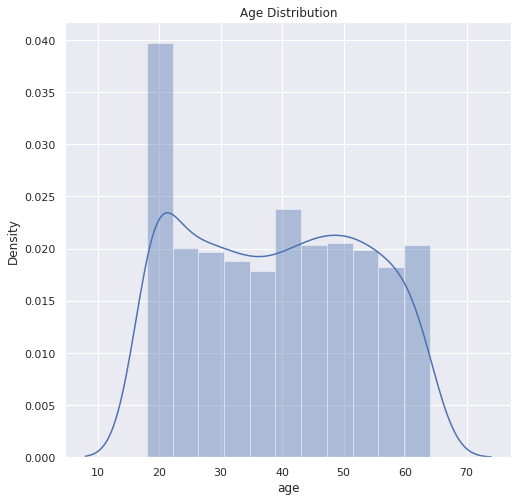

In [11]:
# Distribution of age value
sns.set()
plt.figure(figsize=(8,8))
sns.distplot(insurance_data['age'])
plt.title("Age Distribution")
plt.show()

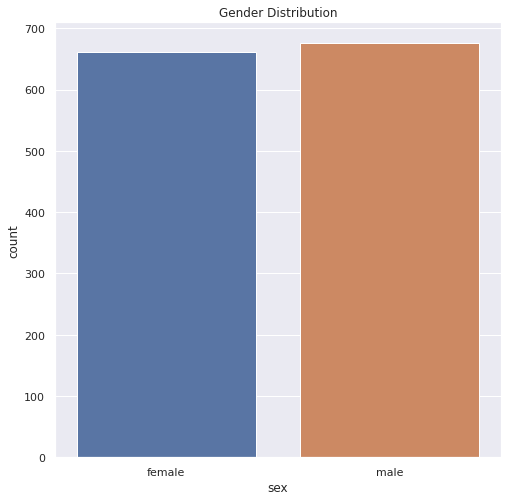

In [12]:
#gender column
plt.figure(figsize=(8,8))
sns.countplot(x= 'sex', data = insurance_data)
plt.title("Gender Distribution")
plt.show()

In [14]:
insurance_data['sex'].value_countsts()

male      676
female    662
Name: sex, dtype: int64

/home/nzangi/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


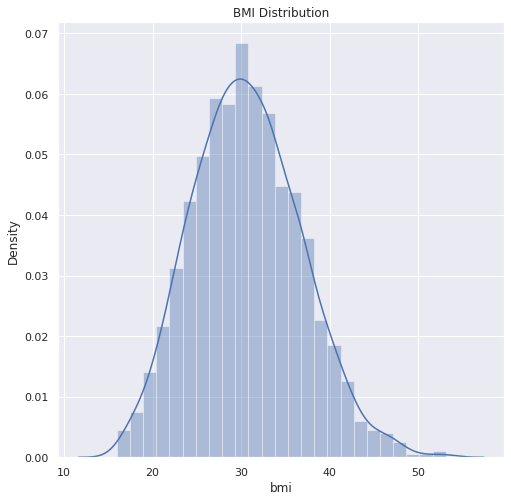

In [15]:
sns.set()
plt.figure(figsize=(8,8))
sns.distplot(insurance_data['bmi'])
plt.title("BMI Distribution")
plt.show()

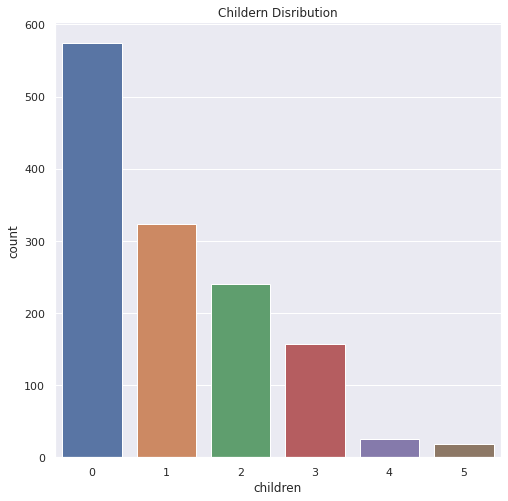

In [17]:
#normal bmi range = 18.5 ---> 24.9
# children column
plt.figure(figsize=(8,8))
sns.countplot(x= 'children',data = insurance_data)
plt.title("Childern Disribution")
plt.show()

In [18]:
insurance_data['children'].value_counts()

0    574
1    324
2    240
3    157
4     25
5     18
Name: children, dtype: int64

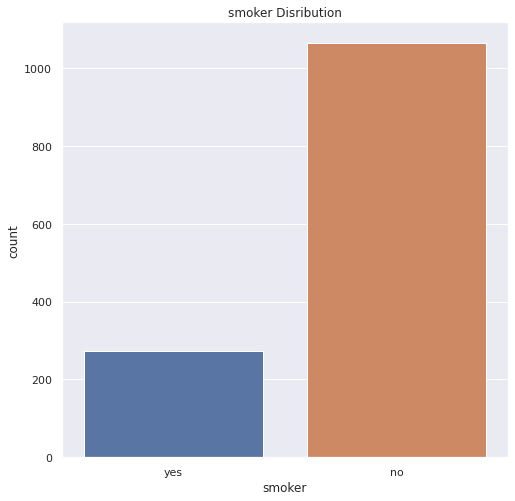

In [19]:
# smoker column
plt.figure(figsize=(8,8))
sns.countplot(x= 'smoker',data = insurance_data)
plt.title("smoker Disribution")
plt.show()

In [20]:
insurance_data['smoker'].value_counts()

no     1064
yes     274
Name: smoker, dtype: int64

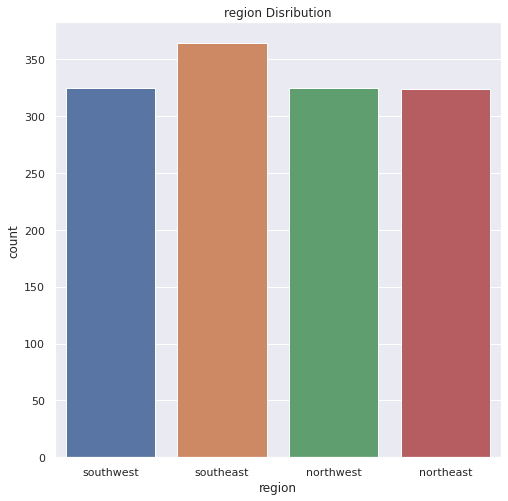

In [21]:
# region column
plt.figure(figsize=(8,8))
sns.countplot(x= 'region',data = insurance_data)
plt.title("region Disribution")
plt.show()

In [22]:
insurance_data['region'].value_counts()

southeast    364
northwest    325
southwest    325
northeast    324
Name: region, dtype: int64

/home/nzangi/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


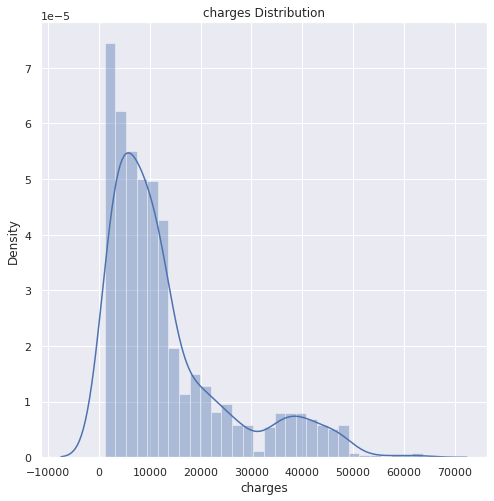

In [23]:
plt.figure(figsize=(8,8))
sns.distplot(insurance_data['charges'])
plt.title("charges Distribution")
plt.show()

In [30]:
#Encoding the categorial features(smoker,region & sex)
# Encoding sex column
insurance_data.replace({'sex':{'male': 0,'female':1}},inplace=True)
#Encoding smoker column
insurance_data.replace({'smoker':{'yes':1,'no':0}},inplace=True)
#Encoding region column
insurance_data.replace({'region':{'southeast':0,'southwest':1,'northeast':2,'northwest':3}},inplace=True)


In [31]:
#spliting the featues and targests
X = insurance_data.drop(columns='charges',axis = 1)
Y = insurance_data['charges']

In [33]:
print(X)


      age  sex     bmi  children  smoker  region
0      19    1  27.900         0       1       1
1      18    0  33.770         1       0       0
2      28    0  33.000         3       0       0
3      33    0  22.705         0       0       3
4      32    0  28.880         0       0       3
...   ...  ...     ...       ...     ...     ...
1333   50    0  30.970         3       0       3
1334   18    1  31.920         0       0       2
1335   18    1  36.850         0       0       0
1336   21    1  25.800         0       0       1
1337   61    1  29.070         0       1       3

[1338 rows x 6 columns]


In [35]:
print(Y)

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64


In [38]:
#split the data into training data and testing data
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size= 0.2,random_state = 2)

In [40]:
print(X.shape,X_train.shape,X_test.shape)

(1338, 6) (1070, 6) (268, 6)


In [41]:
#model Training
model = LinearRegression()

In [42]:
model.fit(X_train,Y_train)

LinearRegression()

In [43]:
#model evaluation
#prediction on training data
training_data_prediction = model.predict(X_train)


In [44]:
#R sq'uared value training
r2_train = metrics.r2_score(Y_train,training_data_prediction)
print(f"The R squared is :{r2_train}")

The R squared is :0.751505643411174


In [46]:
test_data_prediction = model.predict(X_test)


In [47]:
#R squared value of test
r2_test = metrics.r2_score(Y_test,test_data_prediction)
print(f"The R squared is :{r2_test}")

The R squared is :0.7447273869684077


In [54]:
#building a predictive system
input_data = (28,0,33,3,0,0)

#changing the tuple into numpy
input_data_as_numpy = np.asarray(input_data)

#reshape the array
input_data_reshaped = input_data_as_numpy.reshape(1,-1)
prediction = model.predict(input_data_reshaped)
# print(prediction)
print(f"The insurance cost is : {round(prediction[0],2)}")


The insurance cost is : 7121.06
